In [1]:
import pandas as pd

In [2]:
file4= pd.read_excel('volatility_data.xlsx')

In [3]:
file4.head()

,index,Label,date,open,high,low,close,volume,diff
0,0,AAPL,12-12-1980,0.4164,0.4182,0.4164,0.4164,117258400,0.000000
1,1,AAPL,15-12-1980,0.3966,0.3966,0.3947,0.3947,43971200,-5.211335
2,2,AAPL,16-12-1980,0.3675,0.3675,0.3657,0.3657,26432000,-7.347352
3,3,AAPL,17-12-1980,0.3747,0.3766,0.3747,0.3747,21610400,2.461034
4,4,AAPL,18-12-1980,0.3857,0.3874,0.3857,0.3857,18362400,2.935682


In [4]:
file4.describe()

,index,open,high,low,close,volume,diff
count,242646.000000,242646.000000,242646.000000,242646.000000,242646.000000,2.426460e+05,242646.000000
mean,5363.339425,37.030982,37.384201,36.663207,37.034393,1.713336e+07,0.064513
std,3588.783696,95.002349,95.823802,94.074328,94.986996,3.584422e+07,2.306925
min,0.000000,0.010400,0.010400,0.009600,0.010400,0.000000e+00,-99.965467
25%,2278.250000,1.931300,1.961900,1.907700,1.935100,2.336725e+06,-0.883231
50%,4923.000000,14.873550,15.031800,14.707100,14.872550,5.932400e+06,0.000000
75%,7987.000000,36.609400,36.944400,36.292700,36.627500,1.526962e+07,0.982500
max,14330.000000,2038.110000,2050.500000,2013.000000,2039.510000,1.855410e+09,98.845088


In [5]:
labels = file4['Label'].unique()

In [6]:
labels

array(['AAPL', 'AMZN', 'BA', 'BAC', 'CMCSA', 'DIS', 'FB', 'GOOGL', 'HSBC',
       'IBM', 'INTC', 'JNJ', 'KO', 'MA', 'MCD', 'MSFT', 'ORCL', 'PEP',
       'PFE', 'TM', 'TSLA', 'UNH', 'V', 'VZ', 'WFC', 'WMT', 'XOM'],
      dtype=object)

In [7]:
temp100 = list()
allPerLabel = list()
result = list()
s_neg = list()

In [8]:
import numpy as np
import statistics

    
for label in labels:
    data = file4[file4['Label']==label]
    count=2
    ans=1
    
    for x in data['close']:
        if count>=0:
            temp100.append(x)
            count=count-1
        else:
            #if ans==1:
             #  print(np.std(temp100))
            allPerLabel.append(np.std(temp100))
           # if ans==1:
            #    print(allPerLabel)
               # ans=ans-1
            temp100.clear()
            temp100.append(x)
            #temp100
            count=100
    result.append(statistics.mean(allPerLabel))
    #print(result)
    allPerLabel.clear()
    count=100


In [9]:
result

[1.5516540369110678,
 19.0262840516069,
 4.516174117870255,
 2.1234566486259623,
 0.6529238423092047,
 1.1029002691802934,
 6.884336211190451,
 25.700076038932778,
 6.133647986291859,
 2.40972319761851,
 1.703064543843531,
 1.0516501237523876,
 0.6280659240863447,
 3.521612960456809,
 1.36527309188712,
 1.454463991196709,
 1.2968775909101296,
 1.0558680139764407,
 0.6558150926200754,
 2.6817095902226735,
 14.520186932423355,
 3.3975784115133183,
 3.9545902702724205,
 1.5639645590431348,
 0.7483391697460027,
 1.2163428825535179,
 1.1289200848713845]

In [10]:
data_new=pd.DataFrame(result)

In [11]:
data_new

,0
0,1.551654
1,19.026284
2,4.516174
3,2.123457
4,0.652924
5,1.102900
6,6.884336
7,25.700076
8,6.133648
9,2.409723


In [12]:
file4= pd.read_excel('finalnew2.xlsx')

In [21]:
data_new=pd.DataFrame(file4)

In [22]:
data_new

,index,close
0,0,3.325472
1,1,14.948340
2,2,9.480086
3,3,2.688665
4,4,0.828690
5,5,2.606977
6,6,3.704209
7,7,25.449785
8,8,13.006269
9,9,7.532422


In [23]:
from sklearn.cluster import MeanShift

clustering =MeanShift(bandwidth=4).fit(data_new)
clustering.labels_

array([3, 5, 6, 3, 3, 3, 3, 7, 8, 4, 4, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2], dtype=int64)

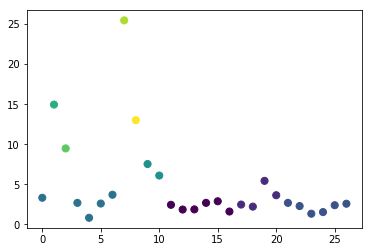

In [25]:
import matplotlib.pyplot as plt
plt.scatter(data_new['index'], data_new['close'], c=clustering.labels_,
            s=50, cmap='viridis');

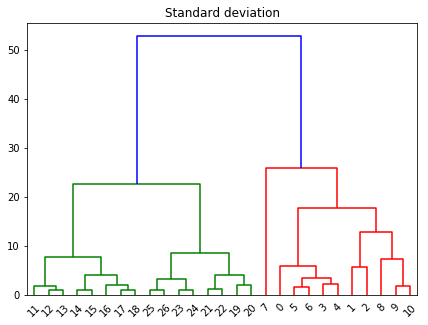

In [26]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(7, 5))  
plt.title("Standard deviation")  
dend = shc.dendrogram(shc.linkage(data_new, method='ward')) 

In [27]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
labels=cluster.fit_predict(data_new) 
labels

array([9, 0, 0, 2, 2, 2, 2, 5, 8, 7, 7, 3, 3, 3, 4, 4, 4, 4, 4, 1, 1, 1,
       1, 6, 6, 6, 6], dtype=int64)

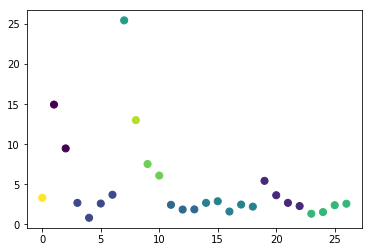

In [28]:
plt.scatter(data_new['index'], data_new['close'], c=labels,
            s=50, cmap='viridis');

Text(0.5,1,'Kmeans-std deviation')

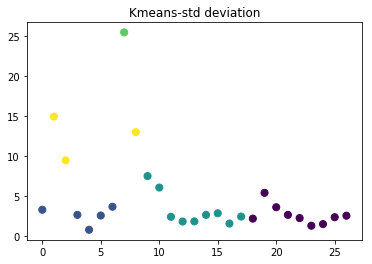

In [29]:
from sklearn.cluster import KMeans
labels = KMeans(5, random_state=0).fit_predict(data_new)
plt.scatter(data_new['index'], data_new['close'], c=labels,
            s=50, cmap='viridis');
plt.title('Kmeans-std deviation')
